<div class=title>
<strong><center><font size="3">DAY 16 - IYKRA</font></center>
<hr>
<center><font size="5"><strong>Self-Practice 5 and 6</strong></font></center>
<center><font size="4"><strong>Supervised and Unsupervised Learning</strong></font></center>
<hr>
<p style="text-align:center">Author</p>
<center>Joshua Effendi</center>
<p style="text-align:center">Date:</p>
<center>11 November 2019</center></strong>
</div>

<div class=title1>
    <b><font size='3'>Import Basic Libraries</font></b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import HTML

def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<div class=title1>
    <b><font size='3'>Import Machine Learning Libraries</font></b>
</div>

In [2]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.16,0.82,6,202,4,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.43,0.48,2,153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.39,0.54,2,127,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0.73,1.00,5,253,6,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0.44,0.46,2,149,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
0,0.66,0.62,4,250,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.66,0.50,4,263,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.32,0.74,3,211,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.37,0.57,2,155,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.41,0.49,2,130,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


<div class=question>
    <p><b>Given the <i>train.csv</i> and <i>test.csv</i>, perform the following actions.</b></p>
    <ol>
        <li>Create classifiers from train.csv data, in order to predict <b><i>att10</i></b> as label based on the
            rest of the attributes. Use at least 5 algorithms (k-NN, Decision Tree, Logistic
            Regression, Voting, Averaging, Bagging, Random Forest, Averaging, Voting, AdaBoost,
            XGBoost, LightGBM, CatBoost, or Stacking). Use AUC for your model evaluation
            performance.</li>
        <p>Submit your .ipynb file that contains your coding process in creating classifiers.</p>
        <hr>
        <li>Choose the best Classifier based on highest AUC and use it for predicting the test.csv
            data.</li>
        <p>Submit your .csv file that contains the prediction of test.csv data. Sample of prediction
            can be found in <b><i>sample_prediction.csv</i></b> file.</p>
    </ol> 
</div>

<div class=title1>
    <b><font size='3'>Machine Learning Model - Supervised</font></b>
</div>

In [5]:
x = df_train.iloc[:,0:len(df_train.columns)-1]
y = df_train.iloc[:,len(df_train.columns)-1]
x = preprocessing.normalize(x)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420, stratify=y)

In [7]:
clf_lr = LogisticRegression()
clf_knn = KNeighborsClassifier(5)
clf_dt = DecisionTreeClassifier()
clf_et = ExtraTreesClassifier()
clf_rf = RandomForestClassifier()
clf_voting = VotingClassifier(estimators=[('knn', clf_knn), ('dt', clf_dt), ('lr', clf_lr)])
clf_averaging = VotingClassifier(estimators=[('knn', clf_knn),('dt', clf_dt),('lr', clf_lr)], voting='soft', weights=[1,1,2])
clf_bagging_lr = BaggingClassifier(LogisticRegression(),max_samples=0.5, max_features=0.5)
clf_bagging_knn = BaggingClassifier(KNeighborsClassifier(5),max_samples=0.5, max_features=0.5)
clf_bagging_dt = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=0.5)
clf_bagging_et = BaggingClassifier(ExtraTreesClassifier(),max_samples=0.5, max_features=0.5)
clf_bagging_rf = BaggingClassifier(RandomForestClassifier(),max_samples=0.5, max_features=0.5)
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100,learning_rate=0.2)
clf_grad = GradientBoostingClassifier()
clf_xgb = XGBClassifier()
clf_cat = CatBoostClassifier(iterations=2,learning_rate=0.1,depth=2)
clf_stack = StackingClassifier(classifiers=[clf_knn, clf_dt, clf_et, clf_rf, clf_voting, clf_averaging, clf_bagging_lr,
                                            clf_bagging_knn, clf_bagging_dt, clf_bagging_et, clf_bagging_rf, clf_ada,
                                            clf_grad, clf_xgb, clf_cat], 
                               meta_classifier=clf_lr)

In [8]:
def lgb_model(X_train, y_train, X_test, y_test, X_val):
    np.random.seed(69420)
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    parameters = {
        'application': 'binary',
        'objective': 'binary',
        'metric': 'auc',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'num_leaves': 31,
        'feature_fraction': 0.5,
        'bagging_fraction': 0.5,
        'bagging_freq': 20,
        'learning_rate': 0.05,
        'verbose': 0
    }

    lgb_model = lgb.train(parameters,
                           train_data,
                           valid_sets=test_data,
                           num_boost_round=5000,
                           early_stopping_rounds=100)

    y_pred = lgb_model.predict(X_val)
    predictions = [round(value) for value in y_pred]
    return y_pred,predictions

In [9]:
ml = {'clf_lr':clf_lr, 'clf_knn':clf_knn, 'clf_dt':clf_dt, 'clf_et':clf_et, 'clf_rf':clf_rf, 'clf_voting':clf_voting,
     'clf_averaging':clf_averaging, 'clf_bagging_lr':clf_bagging_lr, 'clf_bagging_knn':clf_bagging_knn,
     'clf_bagging_dt':clf_bagging_dt, 'clf_bagging_et':clf_bagging_et, 'clf_bagging_rf':clf_bagging_rf,
     'clf_ada':clf_ada, 'clf_grad':clf_grad, 'clf_xgb':clf_xgb, 'clf_cat':clf_cat, 'clf_stack':clf_stack}

In [10]:
np.random.seed(69420)
best_model_loop = '0'
best_model_auc = 0
for i in ml:
    model = ml.get(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model: {} with Score: \n{}".format(i, classification_report(y_test, y_pred)))
    print("AUC of {}: {:0.3f}\n".format(i,roc_auc_score(y_test, y_pred)))
    if best_model_auc < roc_auc_score(y_test, y_pred):
        best_model_auc = roc_auc_score(y_test, y_pred)
        best_model_loop = i

Model: clf_lr with Score: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1824
           1       0.00      0.00      0.00       576

    accuracy                           0.76      2400
   macro avg       0.38      0.50      0.43      2400
weighted avg       0.58      0.76      0.66      2400

AUC of clf_lr: 0.500

Model: clf_knn with Score: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1824
           1       0.81      0.86      0.84       576

    accuracy                           0.92      2400
   macro avg       0.88      0.90      0.89      2400
weighted avg       0.92      0.92      0.92      2400

AUC of clf_knn: 0.899

Model: clf_dt with Score: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1824
           1       0.91      0.93      0.92       576

    accuracy                           0.96      2400
 

In [11]:
print("Best Model: {}, AUC Score: {:0.3f}".format(best_model_loop, best_model_auc))

Best Model: clf_stack, AUC Score: 0.963


In [12]:
lgb_model(X_train, y_train, X_test, y_test, X_test)

[1]	valid_0's auc: 0.912182
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.95806
[3]	valid_0's auc: 0.966186
[4]	valid_0's auc: 0.967891
[5]	valid_0's auc: 0.972853
[6]	valid_0's auc: 0.973093
[7]	valid_0's auc: 0.973626
[8]	valid_0's auc: 0.974358
[9]	valid_0's auc: 0.973801
[10]	valid_0's auc: 0.974604
[11]	valid_0's auc: 0.974368
[12]	valid_0's auc: 0.974326
[13]	valid_0's auc: 0.974824
[14]	valid_0's auc: 0.975287
[15]	valid_0's auc: 0.974593
[16]	valid_0's auc: 0.974324
[17]	valid_0's auc: 0.974075
[18]	valid_0's auc: 0.973077
[19]	valid_0's auc: 0.973392
[20]	valid_0's auc: 0.974242
[21]	valid_0's auc: 0.975832
[22]	valid_0's auc: 0.976446
[23]	valid_0's auc: 0.976848
[24]	valid_0's auc: 0.977655
[25]	valid_0's auc: 0.977779
[26]	valid_0's auc: 0.977677
[27]	valid_0's auc: 0.977672
[28]	valid_0's auc: 0.977823
[29]	valid_0's auc: 0.978273
[30]	valid_0's auc: 0.978537
[31]	valid_0's auc: 0.978932
[32]	valid_0's auc: 0.979104
[33]	valid_0's auc: 

(array([0.02591439, 0.08642816, 0.96781721, ..., 0.03762735, 0.90293614,
        0.93757713]),
 [0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  

<div class=cbox>
    <b>Since LGB has the highest AUC, so pick LGB for the model</b>
</div>

In [13]:
X_val = preprocessing.normalize(df_test.copy())

In [14]:
def lgb_model(X_train, y_train, X_test, y_test, X_val):
    np.random.seed(69420)
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    parameters = {
        'application': 'binary',
        'objective': 'binary',
        'metric': 'auc',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'num_leaves': 31,
        'feature_fraction': 0.5,
        'bagging_fraction': 0.5,
        'bagging_freq': 20,
        'learning_rate': 0.05,
        'verbose': 0
    }

    lgb_model = lgb.train(parameters,
                           train_data,
                           valid_sets=test_data,
                           num_boost_round=5000,
                           early_stopping_rounds=100)

    y_pred = lgb_model.predict(X_val)
    predictions = [round(value) for value in y_pred]
    df_test['prob'] = y_pred
    df_test['result'] = predictions
    return y_pred,predictions

In [15]:
lgb_model(X_train, y_train, X_test, y_test, X_val)

[1]	valid_0's auc: 0.912182
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.95806
[3]	valid_0's auc: 0.966186
[4]	valid_0's auc: 0.967891
[5]	valid_0's auc: 0.972853
[6]	valid_0's auc: 0.973093
[7]	valid_0's auc: 0.973626
[8]	valid_0's auc: 0.974358
[9]	valid_0's auc: 0.973801
[10]	valid_0's auc: 0.974604
[11]	valid_0's auc: 0.974368
[12]	valid_0's auc: 0.974326
[13]	valid_0's auc: 0.974824
[14]	valid_0's auc: 0.975287
[15]	valid_0's auc: 0.974593
[16]	valid_0's auc: 0.974324
[17]	valid_0's auc: 0.974075
[18]	valid_0's auc: 0.973077
[19]	valid_0's auc: 0.973392
[20]	valid_0's auc: 0.974242
[21]	valid_0's auc: 0.975832
[22]	valid_0's auc: 0.976446
[23]	valid_0's auc: 0.976848
[24]	valid_0's auc: 0.977655
[25]	valid_0's auc: 0.977779
[26]	valid_0's auc: 0.977677
[27]	valid_0's auc: 0.977672
[28]	valid_0's auc: 0.977823
[29]	valid_0's auc: 0.978273
[30]	valid_0's auc: 0.978537
[31]	valid_0's auc: 0.978932
[32]	valid_0's auc: 0.979104
[33]	valid_0's auc: 

(array([0.00929552, 0.00782148, 0.06368538, ..., 0.98636334, 0.18741297,
        0.00393236]),
 [0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  

In [16]:
df_test

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,prob,result
0,0.66,0.62,4,250,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.009296,0.0
1,0.66,0.50,4,263,3,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.007821,0.0
2,0.32,0.74,3,211,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.063685,0.0
3,0.37,0.57,2,155,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.990317,1.0
4,0.41,0.49,2,130,3,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.986907,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.53,0.70,4,243,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.110047,0.0
1996,0.66,0.67,2,255,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.487063,0.0
1997,0.40,0.46,2,132,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.986363,1.0
1998,0.24,0.76,6,213,4,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.187413,0.0


In [17]:
df_test.to_csv('test_result.csv',index=False)

<div class=question>
    <ol>
        <li>Select att1 and att2 from train.csv and test.csv data. This step will result a new data
            frame or a table with size of 10,000 rows and 2 columns. Perform clustering using at
            least 3 algorithms (K-Means Clustering, Hierarchical Clustering, and DBSCAN) to
            cluster that new data frame.</li>
        <p>Submit your .ipynb file that contain the process of your clustering!</p>
        <hr>
        <li> Assume that the dataset you are working is the employee data, whether
            att1 is satisfaction level (the higher the satisfaction level, the more satisfy a person
            does in his employment) att2 is evaluation result (the higher the evaluation result, the better/harder a person
            works in the company).</li>
        <p>Can you name the clusters that you have just made?</p>
    </ol> 
</div>

<div class=title1>
    <b><font size='3'>Machine Learning Model - Unsupervised</font></b>
</div>

In [18]:
df_com = pd.concat([df_train,df_test])

In [19]:
df_cl = df_com[['att1','att2']]
df_cl.head()

,att1,att2
0,0.16,0.82
1,0.43,0.48
2,0.39,0.54
3,0.73,1.00
4,0.44,0.46


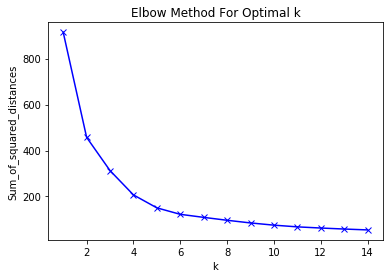

In [20]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
   km = KMeans(n_clusters=k)
   km = km.fit(df_cl)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<div class=cbox>
    <b>Best K = 4, so pick 4 for K</b>
</div>

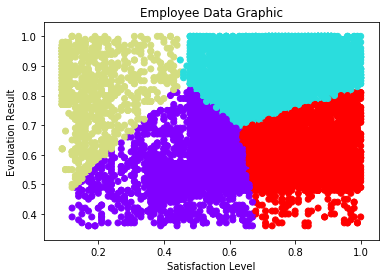

In [21]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cl)
plt.scatter(df_cl['att1'],df_cl['att2'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

<div class=cbox>
    <b>As seen from the graphic, there are 4 types of employees: the hardworker with high satisfaction, the hardworker with low satisfaction, the lazy with high satisfaction, and the lazy with low satisfaction.</b>
</div>

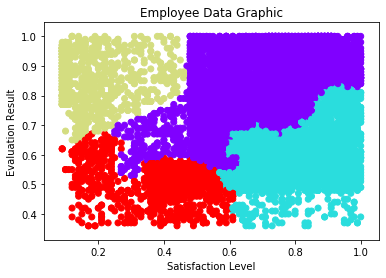

In [22]:
cls_hier = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cls_hier.fit(df_cl)
plt.scatter(df_cl['att1'],df_cl['att2'], c=cls_hier.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

<div class=cbox>
    <b>As seen from the graphic, there are 4 types of employees: the hardworker with high satisfaction, the hardworker with low satisfaction, the lazy with high satisfaction, and the lazy with low satisfaction. Similar to KMeans</b>
</div>

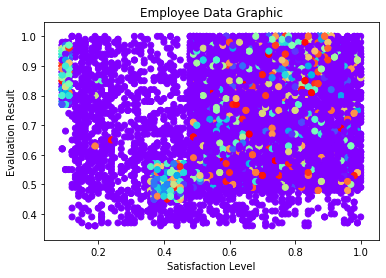

In [23]:
dbscan = DBSCAN(eps=0.00001)
dbscan.fit(df_cl)
plt.scatter(df_cl['att1'],df_cl['att2'], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

<div class=cbox>
    <b>As seen from the graphic, it's uninterpretable.</b>
</div>